### Source 
[Here](https://github.com/Xianzhiwang1/CS0451-page-site/tree/main/posts/) is a link to the source code for this gradient descent blog post.

### Reference
[Here](https://middlebury-csci-0451.github.io/CSCI-0451/lecture-notes/gradient-descent.html) is a link to the main reference we are using when crafting this blog post.

### Introduction
Let's recall what problem we are investigating. We are working on the *empirical risk minimization* problem, which involves finding a weight vector `w`, that satisfy the following general form:
$$ 
\hat{w} = \arg \min_{w} L(w). 
$$ 
where 

$$ 
L(w) =  \frac{1}{n} \sum_{i=1}^{n} \ell [ f_w(x_i), y_i ]  
$$
is our loss function. In a previous blog post, we took $\ell(\cdot, \cdot)$ to be the 0-1 loss, but this time, we are going to use a different function called logistic loss, and it is detailed below. First, let's recall what is matrix `X` and what are we doing.  


Remember from our previous blog post that our data includes a feature matrix `X`, which is a $n\times p$ matrix with entries being real numbers. The feature matrix `X` is a bunch of rows stacked together, and each row is going to represent a data point in our data set. Hence, since we have $n$ data points in our data set, we have $n$ rows in our feature matrix `X`. Since we record in each data point $p$ many features that constitutes this data point, our feature matrix `X` has $p$ columns. In other words, the number $n$ represents the number of distinct observations, corresponding to $n$ rows in `X`. $p$ will always denote the number of features in this blog post. Our data also have a `y`, which is called target vector and lives in $\mathbb{R}^n$. The target vector gives a label for each observation. Hence, we have `X`, which contains a lot of information, and we want to predict `y`.

We also need some formulas that's computed using pen and paper by our friends in the math department. First, we remember this piece of notation $$ f_w(x) := \langle w, x \rangle $$ and we could obtain the following:
$$ \nabla L(w) = \nabla ( \frac{1}{n} \sum_{i=1}^{n} \ell [ f_w(x_i), y_i ] ). $$
And remember $ \hat{y_i} = \langle w, x_i \rangle $ (another piece of notation!), the logistic loss we are using is 
$$ \ell(\hat{y}, y) = -y \log \sigma (\hat{y}) - (1-y) \log(1-\sigma(\hat{y})), $$
where $ \sigma() $ denotes the logistical sigmoid function. as demonstrated in the link under the *Reference* heading above, we have
$$ \frac{d \ell(\hat{y},y)}{d \hat{y}} = \sigma (\hat{y}) -y. $$ 
Therefore, with some effort, one can do this computation and obtain the following formula:
$$ \nabla L(w) = \frac{1}{n} \sum_{i=1}^{n} (\sigma(\hat{y_i}) - y_i) x_i, $$
and this will help us to implement the gradient of the empirical risk for logistic regression in python code using `numpy` library.




Recall that in single variable calculus, gradient is just the derivative of a function. In multivariable calculus, since we have more than one variable, we take derivative with respect to each variable and put them in a vector to get our gradient. In formulas, let $f(z_1, z_2, \cdots, z_p): \mathbb{R}^p \mapsto \mathbb{R}$ be our function, and the gradient of $f$, denoted by $\nabla f$ is given by 
$$ \nabla f(z_1, z_2, \cdots, z_p) := \begin{bmatrix}
&\frac{\partial f}{\partial z_1}\\
&\frac{\partial f}{\partial z_2}\\
&\vdots\\
&\frac{\partial f}{\partial z_p}\\
\end{bmatrix}
$$
Hence, given a vector 
$$\mathbf{z} = \begin{bmatrix} 
&z_1\\
&z_2\\
&\vdots\\
&z_p
\end{bmatrix}
$$
we know that $\nabla f(\mathbf{z})$ is also going to be a vector of the same dimesion, we could put them in the same equations. Hence, the following Batch Gradient Descent Algorithm makes sense.  

###  Batch Gradient Descent Algorithm:
for function $f$, starting point $z^{(0)}$, and learning rate $\alpha$, we perform the following update step many many times:
$$
z^{(t+1)} \leftarrow z^{(t)} - \alpha \nabla f(z^{(t)})
$$
Return the final value $z^{(t)}$.

In code, we need a precise way to decide when to stop after performing the update many times. One way is to stop when we reached the `maximum_number_of_iteration` or `max_iter` that is specified by the user, or until convergence, in the sense that $\nabla f(z^{(t)})$ is close to 0. Also, there are math theorems guarantee that $z^{(0)}, z^{(1)}, \cdots, z^{(t)}$ converges to $z^{*}$ under suitable conditions. Now, with the math background out of the way, let's see this in code. 

In [1]:
%load_ext autoreload
%autoreload 2

We start by importing the relavant libraries and creating some data points using the `make_blobs` function that we imported from `sklearn.datasets`. We would like to create some non-separable data, which means graphically in 2 dimension, we cannot draw a straight line to separate the data points of the two different classes (as indicated by the color). Notice that the horizontal axis is Feature 1, and the vertical axis is Feature 2. 

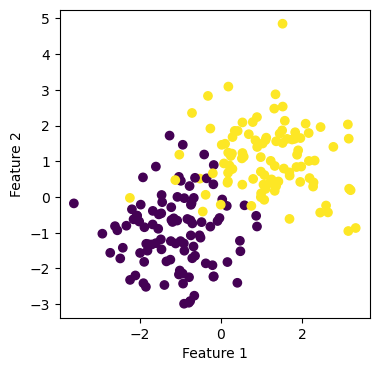

In [3]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (4,4)

import numpy as np
np.random.seed(42)
np.seterr(all='ignore') 

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

Recall that we have feature matrix `X`, which is a $n\times p$ matrix with entries being real numbers. The number $n$ represents the number of distinct observations, and we have $n$ rows in `X`. $p$ is the number of features. Our data also have a `y`, which is called target vector and lives in $\mathbb{R}^n$. The target vector gives a label, value, or outcome for each observation. In the `solutions_logistic.py`, we implemented the gradient descent using the following update step.

$$ w^{(t+1)} \leftarrow w^{(t)}  - \alpha \cdot \nabla L(w^{(t)}), $$   
where $\nabla L(w)$ is given by the following equation:
$$ \nabla L(w) = \frac{1}{n} \sum_{i=1}^{n} \nabla \ell(f_{w}(x_i), y_i)$$
Now let's import our implementation and create plots.


In [4]:
from solutions_logistic import LogisticRegression 
LR = LogisticRegression()
X_ = LR.pad(X)

# inspect the fitted value of w
LR.fit(X, y, alpha = 0.01, max_epochs = 2000)
print(LR.w_)

[ 1.59965852  1.45281308 -0.20047656]


After calling the function `fit`, we obtain the weight vector `w_`,  but are they doing what they are supposed to do? How big is the loss for this perticular case? We could visualize this result by plotting the line that hopefully separates the data points in a intuitive way. See the picture on the *left*. Now we would like to find out about how the empirical loss evolves as the number of iteration goes up. Let's plot this in the picture on the *right*.

In [5]:
np.random.seed(42)
# pick a random weight vector and calculate the loss
w = .5 - np.random.rand(p_features)
# fig = plt.scatter(X_[:,0], X_[:,1], c = y)
# xlab = plt.xlabel("Feature 1")
# ylab = plt.ylabel("Feature 2")
# f1 = np.linspace(-3, 3, 101)
# p = plt.plot(f1, (LR.w_[2] - f1*LR.w_[0])/LR.w_[1], color = "black")
# title = plt.gca().set_title(f"Loss = {LR.last_loss}")

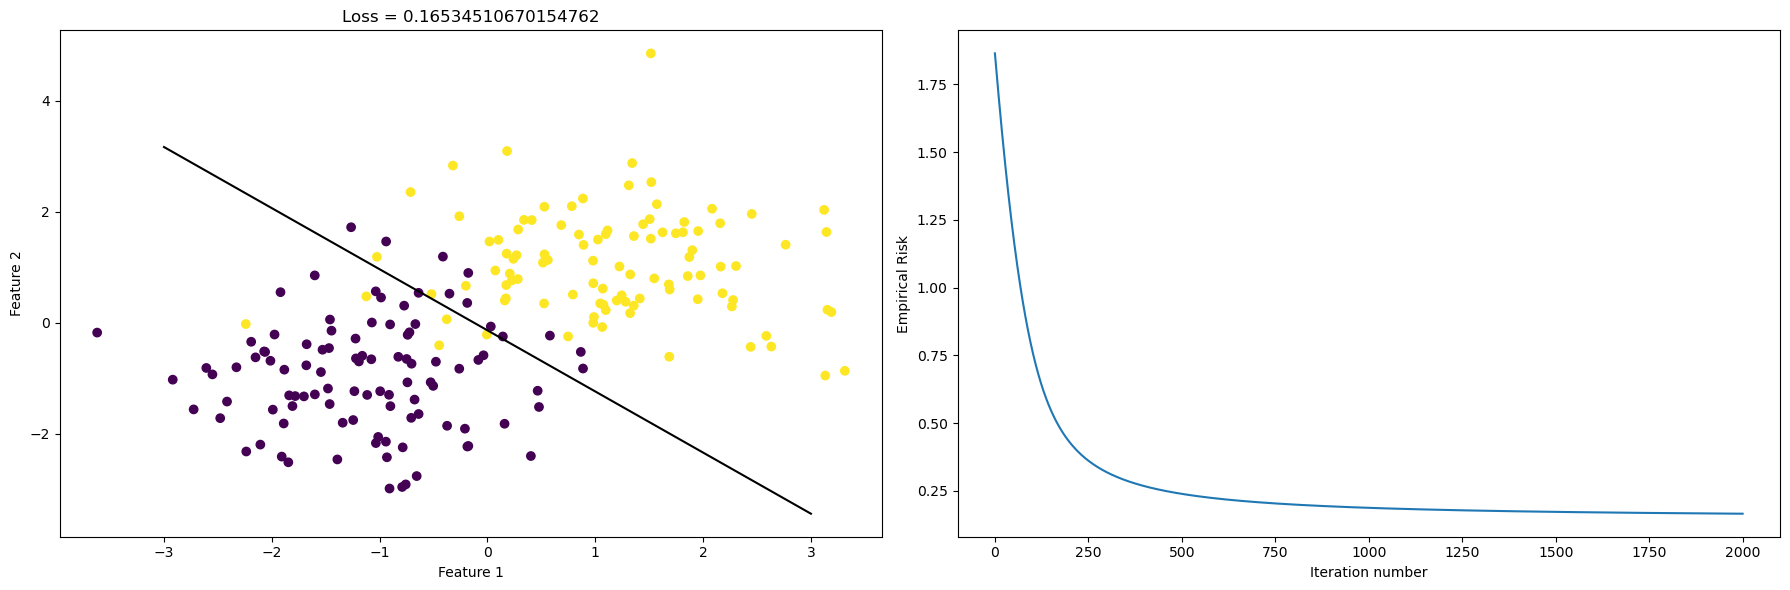

In [6]:
plt.rcParams["figure.figsize"] = (18,6)
fig, axarr = plt.subplots(1, 2)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {LR.last_loss}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (LR.w_[2] - f1*LR.w_[0])/LR.w_[1], color = "black")

axarr[1].plot(LR.loss_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")
plt.tight_layout()

From the plot on the left, we see that our gradient descent algorithm is doing a good job at finding the line that separates the data. From the plot on the right, we see that as the number of itermations on the x-axis increases, the empirical risk goes down. The loss is around $0.15$ to $0.20$, and this is a reasonable number since our data is not linear separable, as we can see from the picture.

### Accuracy of regular gradint descent
Again, we draw the scatter plot and the fitted line on the left, and on the right, we plot the evolution of the accuracy score as the number of iteration increases. 

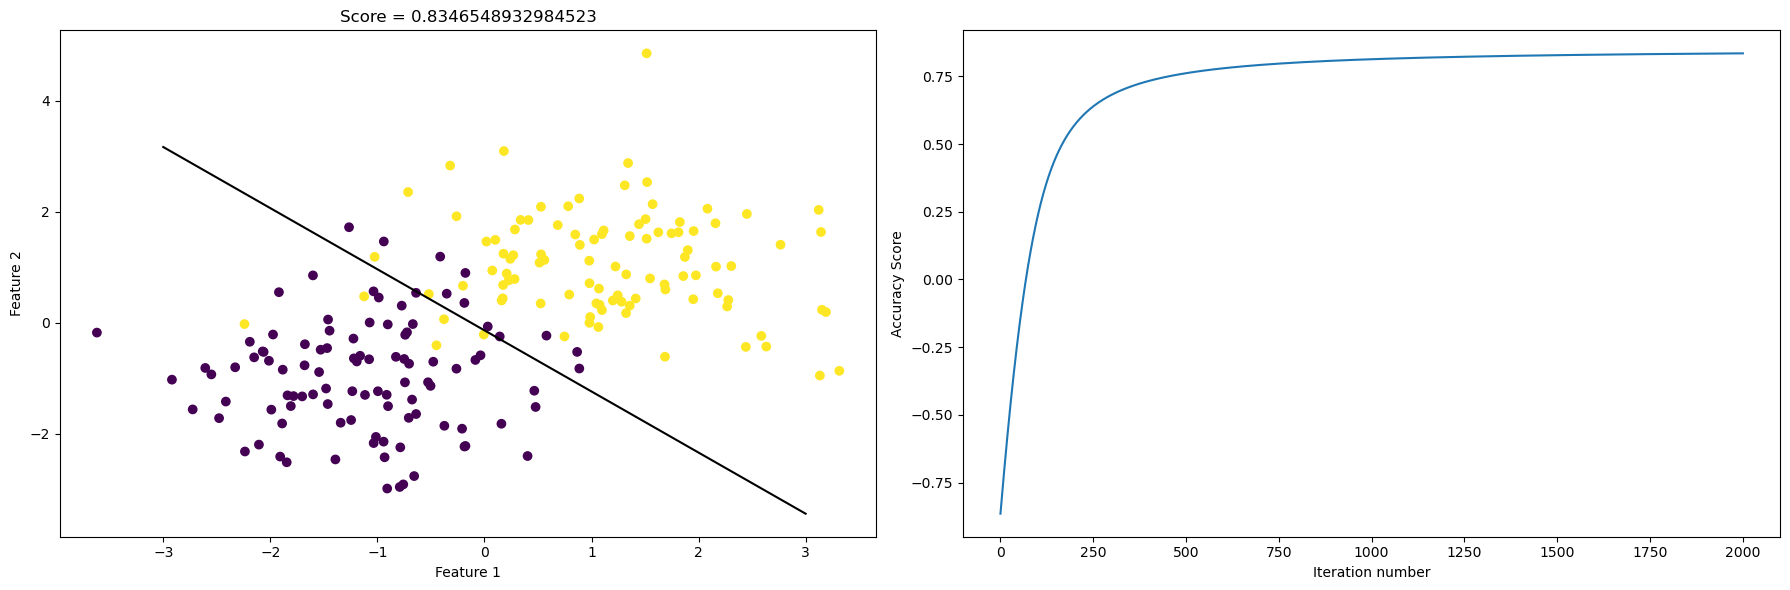

In [6]:
myScore = LR.score(X_,y)

fig, axarr = plt.subplots(1, 2)
axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Score = {myScore}")
f1 = np.linspace(-3, 3, 101)
p = axarr[0].plot(f1, (LR.w_[2] - f1*LR.w_[0])/LR.w_[1], color = "black")
axarr[1].plot(LR.score_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Accuracy Score")
plt.tight_layout()

We could also print out the vector `y` and the predicted vector given by the function `predict()`. In this way, we could have a look "under the hood" and obtain a rough sense how good is our prediction.

In [10]:
print(f"our actual labels: {y}")
print(f"our predicted labels: {LR.predict(X_)}")

our actual labels: [0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1
 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0
 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0
 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0]
our predicted labels: [0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1
 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0
 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0
 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0]


# Stochastic Gradient Descent
Here, by "Stochastic" we just mean we introduce a certain amount of randomness to our gradient descent step. The modification from the regular gradient descent is as follows. We pick a random subset $S \subset [n]$ and we let 
$$ \nabla_S L(w) = \frac{1}{|S|} \sum_{i \in S} \nabla \ell(f_{w}(x_i), y_i).$$
And the rest is business as usual. We deem our weights `w`  as "good enough" when: either the user-specified maximum number of iteration is reached, or the current empirical risk function is "close enough" to the one from the previous iteration. With the mathematics technicality out of the way, let's visualize the scatter plot, the best-fit-line, and the evolution of the empirical risk, and the evolution of the accuracy score all in one go. 

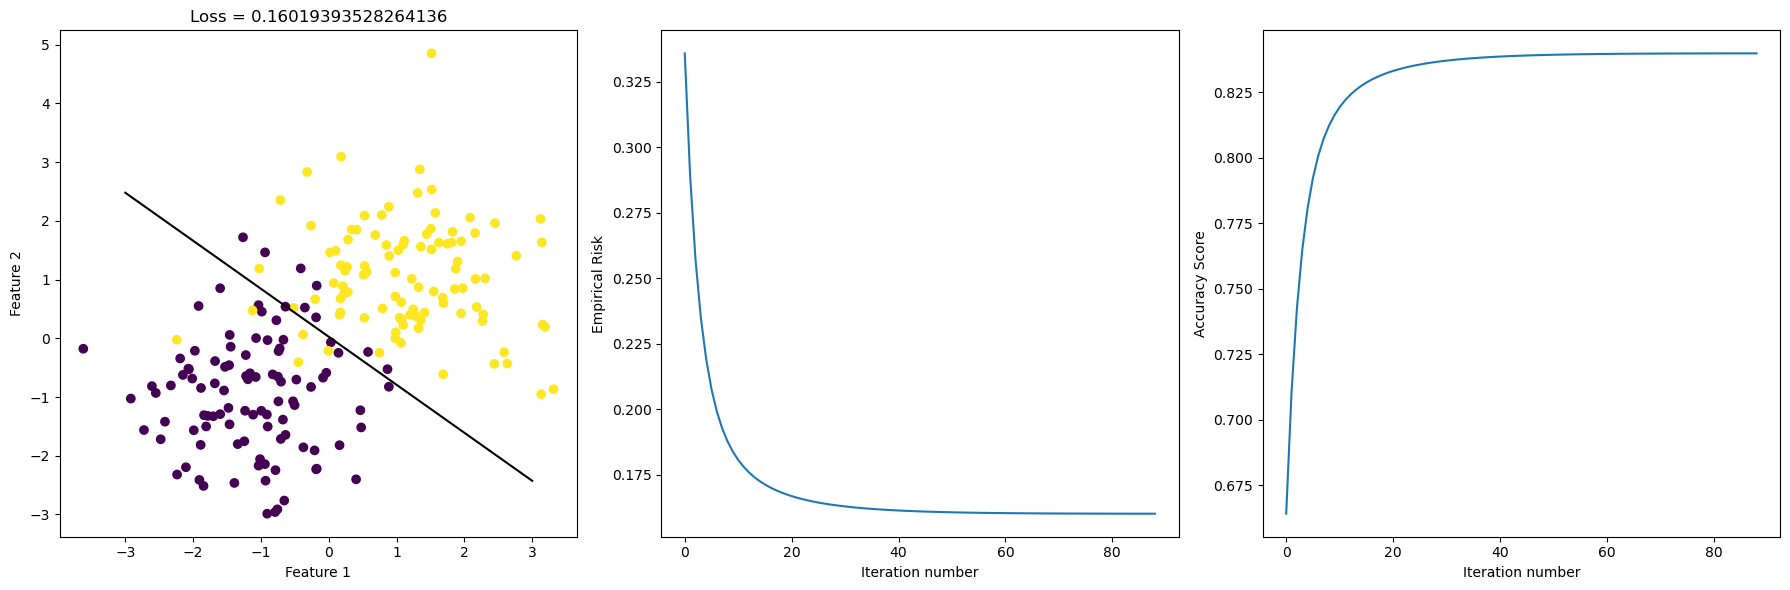

In [28]:

LR.fit_stochastic(X, y, 
                  max_epochs = 10000, 
                  momentum = False, 
                  batch_size = 100, 
                  alpha = 1) 

loss = LR.stochastic_loss_history[-1]

fig, axarr = plt.subplots(1, 3)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {loss}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (LR.omega_[2] - f1*LR.omega_[0])/LR.omega_[1], color = "black")

axarr[1].plot(LR.stochastic_loss_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")

axarr[2].plot(LR.score_history)
axarr[2].set(xlabel = "Iteration number", ylabel = "Accuracy Score")
plt.tight_layout()

Stochastic gradient uses random batches of the data to compute the gradient, and in this case it performs similar to regular gradient descent. We see that as Iteration number increases, the empirical risk decreased and the accuracy score increased. Sometimes, there are kinks in the curve, which means more iterations is not always better. However, this time, there's no kinks, and we see that our stochastic gradient did a good job at minimizing empirical risk as iteration increases.

### Comparison of Gradient Descent, Stochastic Gradient Descent, and Stochastic Gradient with Momentum 
Having seen how regular gradient descent and stochastic gradient descent perform, we could add a momentum feature to the stochastic gradient descent. Then we have the choice of selecting `momentum = True` when we call the function `fit_stochastic`. Hence, we could compare the three versions of gradient descent and plot their respective empirical risk (loss) evolution in one picture, where the horizontal axis is number of iterations, and the vertical axis is empirical risk. Also, let's try having 5 features in our artificial data set for this comparison.

In [49]:
# 5 features
p_features = 5 
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

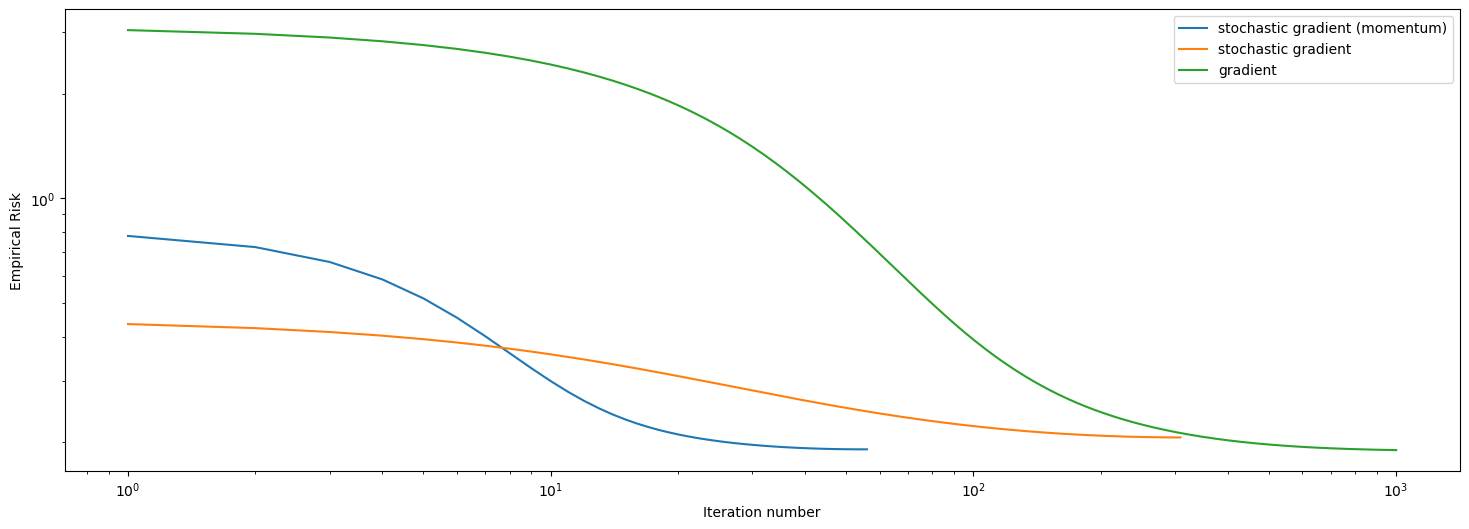

In [50]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 1000, 
                  momentum = True, 
                  batch_size = 100, 
                  alpha = 0.1) 

num_steps = len(LR.stochastic_loss_history)
plt.plot(np.arange(num_steps) + 1, LR.stochastic_loss_history, label = "stochastic gradient (momentum)")

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 1000, 
                  momentum = False, 
                  batch_size = 100, 
                  alpha = 0.1)

num_steps = len(LR.stochastic_loss_history)
plt.plot(np.arange(num_steps) + 1, LR.stochastic_loss_history, label = "stochastic gradient")

LR = LogisticRegression()
LR.fit(X, y, alpha = .05, max_epochs = 1000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

xlab = plt.xlabel("Iteration number")
ylab = plt.ylabel("Empirical Risk")
plt.loglog()

legend = plt.legend() 

We have just ploted the loss history over iteration number of the 3 methods we implemented. As we see in this plot, regular gradient descent is the worst at minimizing the empirical risk, and it also takes the longest to converge. Stochastic gradient did a better job than regular gradient descent at minimzing the empirical risk, and it converges faster. Stochastic gradient descent with momentum is clearly the best here, since it converged before hitting 100 iterations, and it did a good job at minimizing empirical risk, outperforms the regular stochastic after $10$ iterations.

### Choosing an Alpha too big 
Again, we take a look at regular gradient descent, and this time, we experiment with different values of `alpha` that are big.

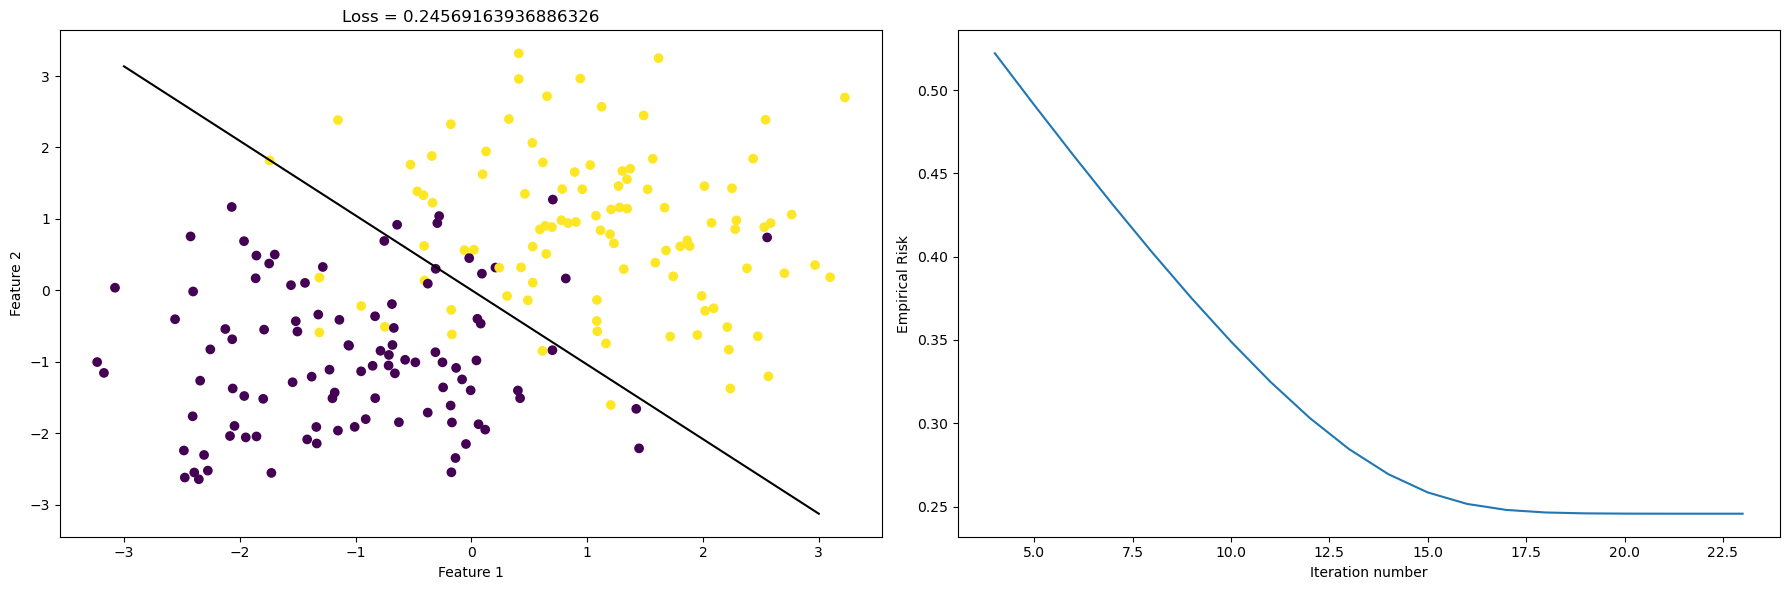

In [51]:
# back to 2 features
p_features = 2 
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])
LR.fit(X, y, alpha = 10, max_epochs = 1000)
fig, axarr = plt.subplots(1, 2)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {LR.last_loss}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (LR.w_[2] - f1*LR.w_[0])/LR.w_[1], color = "black")

axarr[1].plot(LR.loss_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")
plt.tight_layout()

When we choose a big alpha, such as `alpha = 10`, we see that the empirical risk is minimized in a slower way, and our curve on the right is less steep. Still our algorithm managed to find a line that reasonably separates the data.

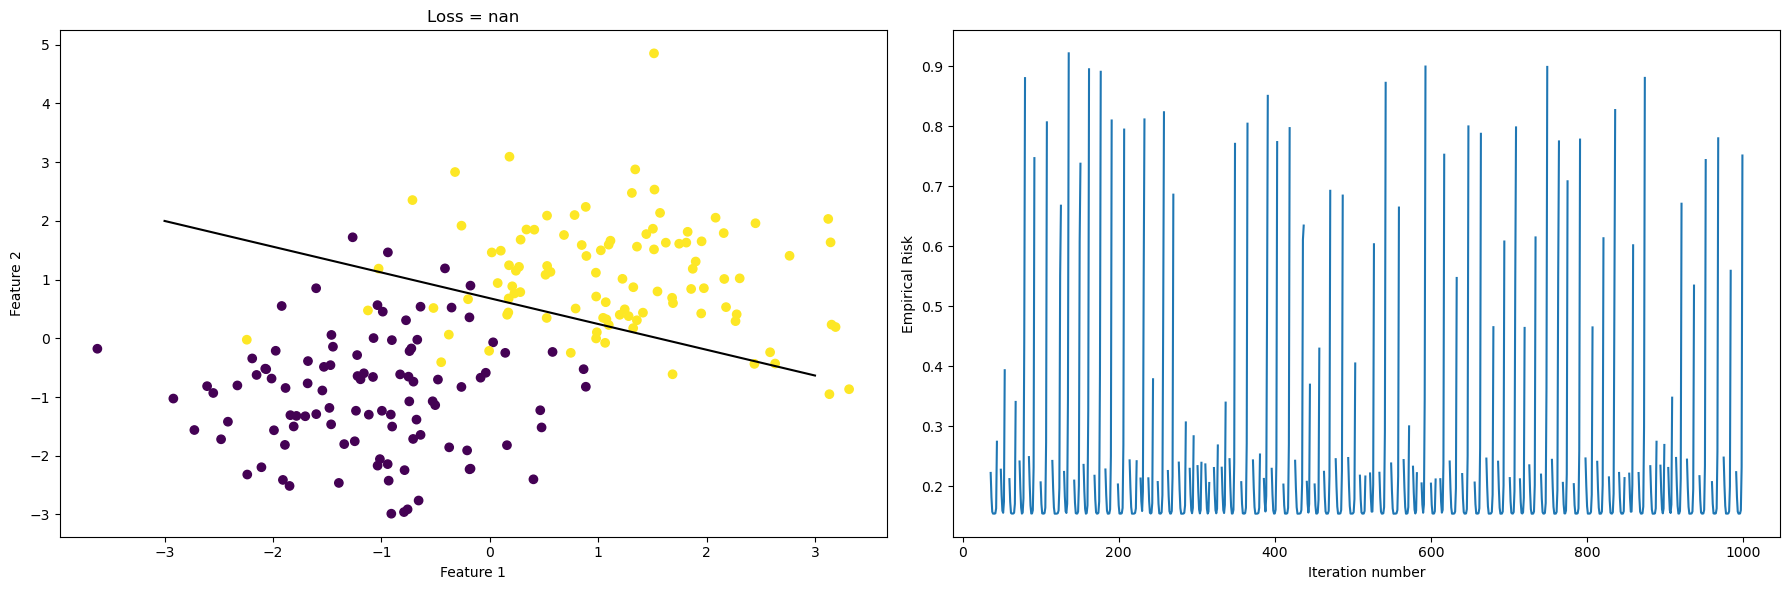

In [26]:
LR.fit(X, y, alpha = 90, max_epochs = 1000)
fig, axarr = plt.subplots(1, 2)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {LR.last_loss}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (LR.w_[2] - f1*LR.w_[0])/LR.w_[1], color = "black")

axarr[1].plot(LR.loss_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")
plt.tight_layout()

This time, we let `alpha=90`, which is creating some strange behaviors if we look at the plot on the right. Again, x-axis is the iteration number, and the y-axis is the empirical risk that we are trying to minimize. However, instead of monotonically decreasing empirical risk as iteration increase, we see that empirical risk jumps up and goes down many times. Also, the separating line in the left plot is also slightly off compared to before. In this case, alpha is too big, and when we take a step in the correct direction, which is $-\nabla f$, we overshot and empirical risk goes up instead of down. Hence we have this periodic behavior.

### Experimenting with batch size that affects convergence speed.

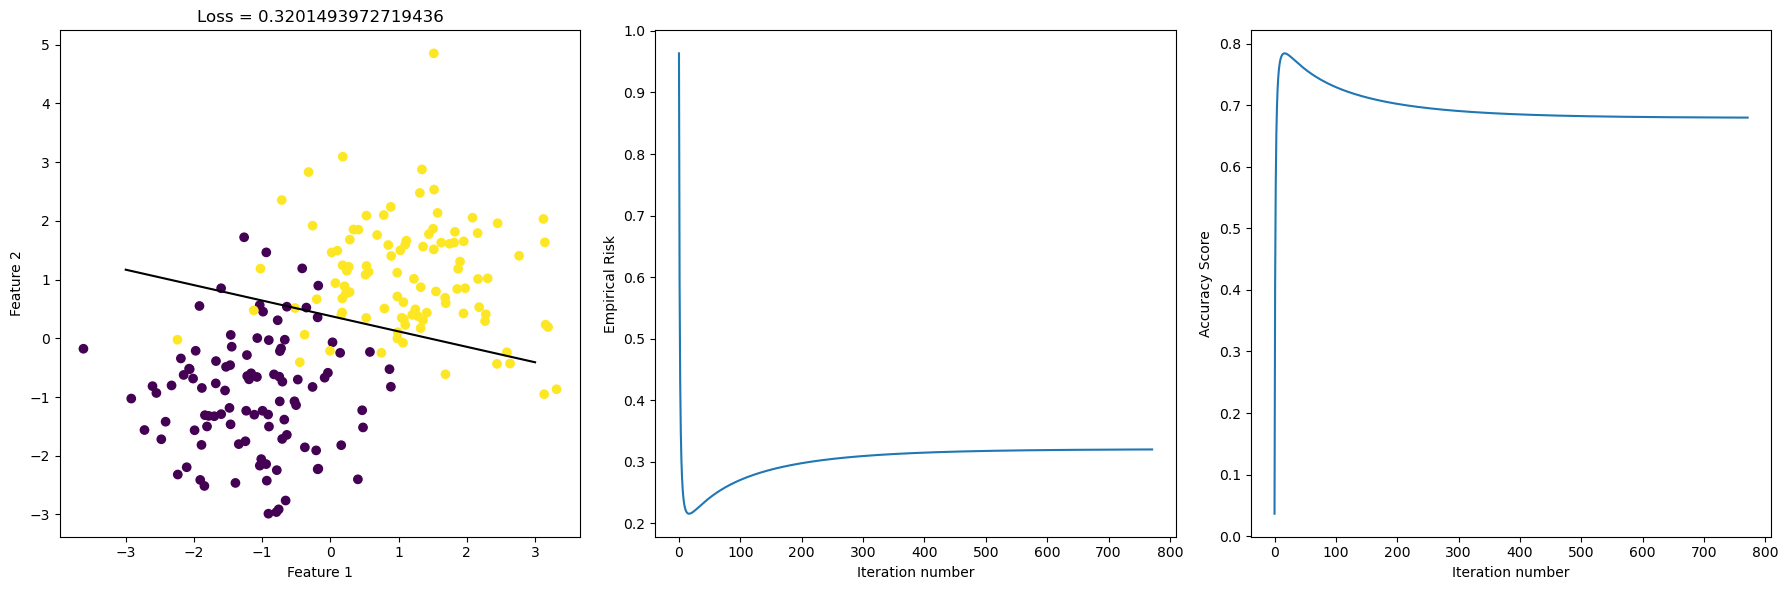

In [35]:
LR.fit_stochastic(X, y, 
                  max_epochs = 5000, 
                  momentum = False, 
                  batch_size = 15, 
                  alpha = 1) 

loss = LR.stochastic_loss_history[-1]

fig, axarr = plt.subplots(1, 3)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {loss}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (LR.omega_[2] - f1*LR.omega_[0])/LR.omega_[1], color = "black")

axarr[1].plot(LR.stochastic_loss_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")

axarr[2].plot(LR.score_history)
axarr[2].set(xlabel = "Iteration number", ylabel = "Accuracy Score")
plt.tight_layout()

We see that as batch size gets smaller, we see Stochastic gradient might not do as well as before, since there's kinks in the accuracy score history. The score hits it's highest point, and then actually descreases slowly as iteration increases. Also, the separating line in the graph on the left is slightly off compared to the ones we had before, and we see that the loss is at $0.32$ this time, which is higher than before. In the plot that's below, we use different batch size and compare convergence behavior as iteration incrases.

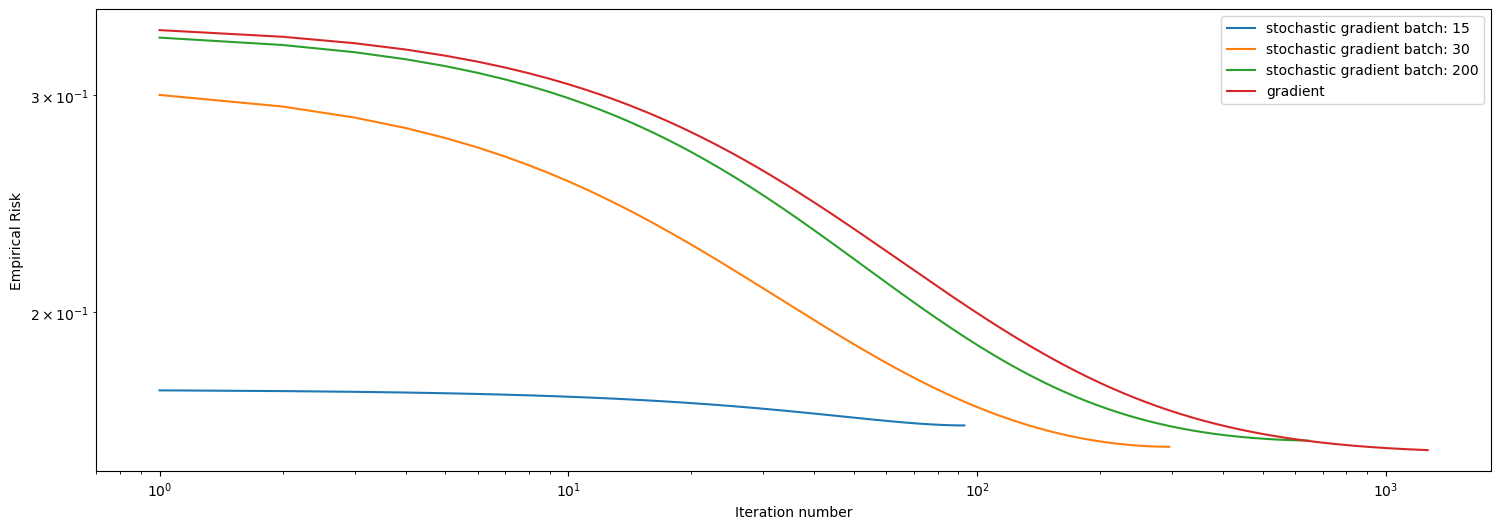

In [40]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 10000, 
                  momentum = False, 
                  batch_size = 15, 
                  alpha = 0.1) 

num_steps = len(LR.stochastic_loss_history)
plt.plot(np.arange(num_steps) + 1, LR.stochastic_loss_history, label = "stochastic gradient batch: 15")

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 10000, 
                  momentum = False, 
                  batch_size = 30, 
                  alpha = 0.1) 

num_steps = len(LR.stochastic_loss_history)
plt.plot(np.arange(num_steps) + 1, LR.stochastic_loss_history, label = "stochastic gradient batch: 30")

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 10000, 
                  momentum = False, 
                  batch_size = 200, 
                  alpha = 0.1)

num_steps = len(LR.stochastic_loss_history)
plt.plot(np.arange(num_steps) + 1, LR.stochastic_loss_history, label = "stochastic gradient batch: 200")

LR = LogisticRegression()
LR.fit(X, y, alpha = .05, max_epochs = 10000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

xlab = plt.xlabel("Iteration number")
ylab = plt.ylabel("Empirical Risk")
plt.loglog()

legend = plt.legend() 

We see that the Stochastic gradient with batch size $200$ is performing relatively okay, using about $1000$ iterations to converge, which is close to the performance of regular gradient descent. We see that smaller batch size actually performs better here, and the one with batch size 15 has converged with $100$ iterations, and it did a good job at minimizing empirical risk. The one with batch size $30$ also did well, converging using about $300$ iterations, definitely faster than the one with batch size 200.

### Does Momentum speeds up convergence and performs better than just Stochastic gradient?

In [45]:
# 10 features
# make the data
p_features = 10 
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])


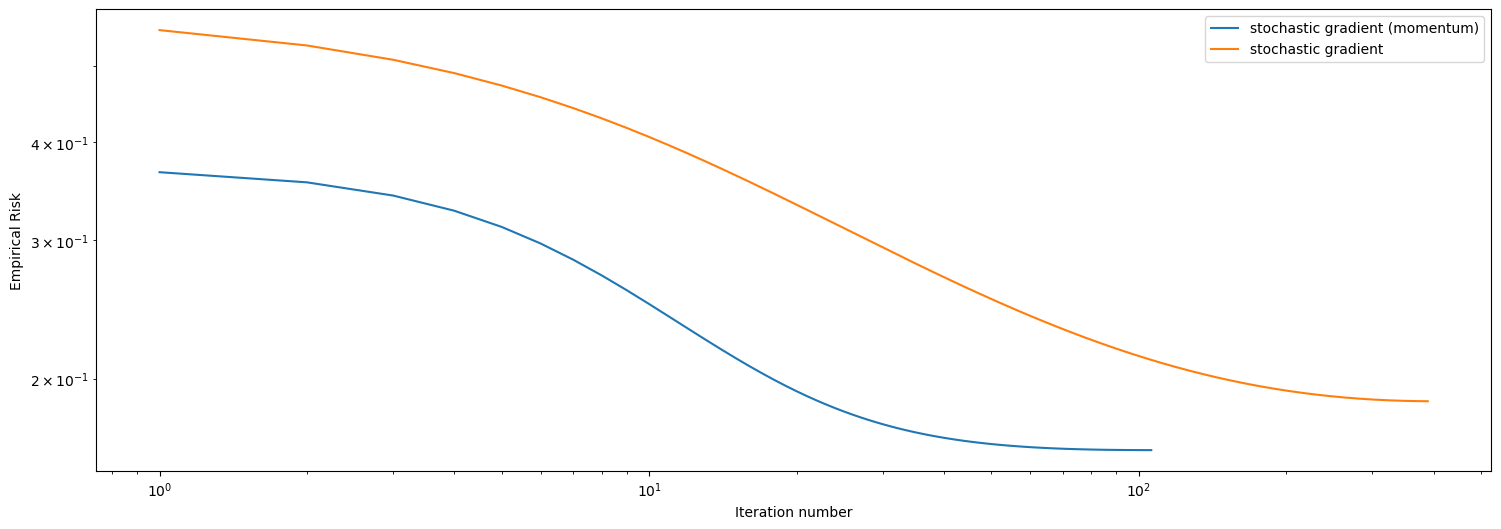

In [46]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 5000, 
                  momentum = True, 
                  batch_size = 90, 
                  alpha = 0.1) 

num_steps = len(LR.stochastic_loss_history)
plt.plot(np.arange(num_steps) + 1, LR.stochastic_loss_history, label = "stochastic gradient (momentum)")

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 5000, 
                  momentum = False, 
                  batch_size = 90, 
                  alpha = 0.1)

num_steps = len(LR.stochastic_loss_history)
plt.plot(np.arange(num_steps) + 1, LR.stochastic_loss_history, label = "stochastic gradient")
xlab = plt.xlabel("Iteration number")
ylab = plt.ylabel("Empirical Risk")
plt.loglog()

legend = plt.legend() 


In this case, with a data set having $10$ features and a batch size of $90$, we see that momentum clearly outperforms regular stochastic gradient descent. At some number of iteration, momentum achieves smaller empirical risk, and it also takes less number of iterations to converge than regular stochastic. And we conclude our blog post here.